# Exploratory Data Analysis: Used Cars
First approach to the data source in order to determine the features and target of the model.

Exploring the different variables will be a good approach to evaluate the impact they have on the final price.

### Importing the main libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [6]:
root = '../data/used_cars.csv'

In [79]:
df = pd.read_csv(root)

df.head()

,title,price,year,kms,city,gear,doors,seats,power,color,...,length,width,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration
0,Toyota Yaris Hsd 1.5 City,9.500€,2016,40.000 km,100 cv en Madrid,"Automática continua, secuencial",5 puertas,5,100 cv,Blanco,...,389 cm,170 cm,286 l,165 km/h,"3,1 l","3,3 l","3,3 l",1.025 kg,36 l,"11,8 s"
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43.890€,2019,24.000 km,306 cv en Salamanca,Automática secuencial,5 puertas,5,306 cv,Blanco,...,444 cm,180 cm,370 l,250 km/h,"9,3 l","6,1 l","7,3 l",1.555 kg,51 l,"4,7 s"
2,Mercedes Clase A A 250e 8g-dct,35.900€,2020,1.500 km,218 cv en Tenerife,Automática secuencial,5 puertas,5,218 cv,Gris,...,442 cm,180 cm,310 l,235 km/h,"0,0 l","0,0 l","1,4 l",1.680 kg,35 l,"6,6 s"
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8.990€,2017,53.000 km,"95 cv en Palmas, Las",Manual,5 puertas,5,95 cv,Blanco,...,405 cm,175 cm,355 l,187 km/h,"5,5 l","4,0 l","4,6 l",1.145 kg,40 l,"10,8 s"
4,Dacia Sandero 1.0 Ambiance 55kw,5.990€,2018,33.600 km,"75 cv en Palmas, Las",Manual,5 puertas,5,75 cv,Blanco,...,406 cm,173 cm,320 l,0 km/h,"6,8 l","3,7 l","5,3 l",969 kg,50 l,"0,0 s"


In [80]:
df[['brand', 'model']] = df.title.str.split(pat=' ', n=1, expand=True)
df.head()

,title,price,year,kms,city,gear,doors,seats,power,color,...,trunk_vol,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,brand,model
0,Toyota Yaris Hsd 1.5 City,9.500€,2016,40.000 km,100 cv en Madrid,"Automática continua, secuencial",5 puertas,5,100 cv,Blanco,...,286 l,165 km/h,"3,1 l","3,3 l","3,3 l",1.025 kg,36 l,"11,8 s",Toyota,Yaris Hsd 1.5 City
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,43.890€,2019,24.000 km,306 cv en Salamanca,Automática secuencial,5 puertas,5,306 cv,Blanco,...,370 l,250 km/h,"9,3 l","6,1 l","7,3 l",1.555 kg,51 l,"4,7 s",Mercedes,Clase A A 35 Amg 4matic+ 7g-dct
2,Mercedes Clase A A 250e 8g-dct,35.900€,2020,1.500 km,218 cv en Tenerife,Automática secuencial,5 puertas,5,218 cv,Gris,...,310 l,235 km/h,"0,0 l","0,0 l","1,4 l",1.680 kg,35 l,"6,6 s",Mercedes,Clase A A 250e 8g-dct
3,Volkswagen Polo 1.0 Tsi Sport 70kw,8.990€,2017,53.000 km,"95 cv en Palmas, Las",Manual,5 puertas,5,95 cv,Blanco,...,355 l,187 km/h,"5,5 l","4,0 l","4,6 l",1.145 kg,40 l,"10,8 s",Volkswagen,Polo 1.0 Tsi Sport 70kw
4,Dacia Sandero 1.0 Ambiance 55kw,5.990€,2018,33.600 km,"75 cv en Palmas, Las",Manual,5 puertas,5,75 cv,Blanco,...,320 l,0 km/h,"6,8 l","3,7 l","5,3 l",969 kg,50 l,"0,0 s",Dacia,Sandero 1.0 Ambiance 55kw


In [81]:
df['price'] = df.pop('price')

df.head()

,title,year,kms,city,gear,doors,seats,power,color,co2_emiss,...,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,brand,model,price
0,Toyota Yaris Hsd 1.5 City,2016,40.000 km,100 cv en Madrid,"Automática continua, secuencial",5 puertas,5,100 cv,Blanco,75 gr/m,...,165 km/h,"3,1 l","3,3 l","3,3 l",1.025 kg,36 l,"11,8 s",Toyota,Yaris Hsd 1.5 City,9.500€
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,2019,24.000 km,306 cv en Salamanca,Automática secuencial,5 puertas,5,306 cv,Blanco,167 gr/m,...,250 km/h,"9,3 l","6,1 l","7,3 l",1.555 kg,51 l,"4,7 s",Mercedes,Clase A A 35 Amg 4matic+ 7g-dct,43.890€
2,Mercedes Clase A A 250e 8g-dct,2020,1.500 km,218 cv en Tenerife,Automática secuencial,5 puertas,5,218 cv,Gris,32 gr/m,...,235 km/h,"0,0 l","0,0 l","1,4 l",1.680 kg,35 l,"6,6 s",Mercedes,Clase A A 250e 8g-dct,35.900€
3,Volkswagen Polo 1.0 Tsi Sport 70kw,2017,53.000 km,"95 cv en Palmas, Las",Manual,5 puertas,5,95 cv,Blanco,106 gr/m,...,187 km/h,"5,5 l","4,0 l","4,6 l",1.145 kg,40 l,"10,8 s",Volkswagen,Polo 1.0 Tsi Sport 70kw,8.990€
4,Dacia Sandero 1.0 Ambiance 55kw,2018,33.600 km,"75 cv en Palmas, Las",Manual,5 puertas,5,75 cv,Blanco,117 gr/m,...,0 km/h,"6,8 l","3,7 l","5,3 l",969 kg,50 l,"0,0 s",Dacia,Sandero 1.0 Ambiance 55kw,5.990€


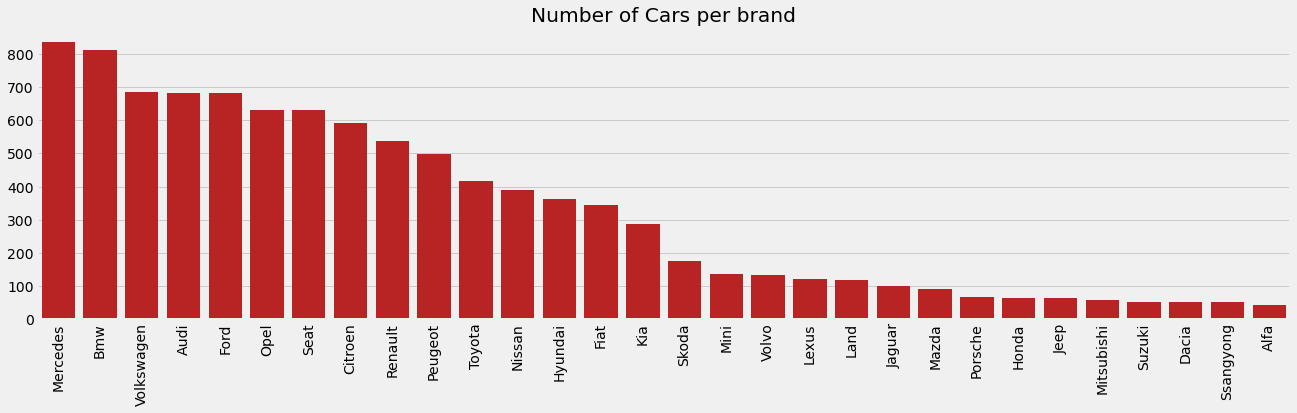

In [82]:
plt.style.use('tableau-colorblind10')

plt.figure(figsize = (20,5))

data = df.brand.value_counts().head(30)

ax = sns.barplot(x=data.index, y=data.values, color='#d10a0a')

plt.title('Number of Cars per brand')
plt.xticks(rotation=90)

plt.show()

In [84]:
df['price'] = df.price.str.replace('€', '').str.replace('.', '').astype(int)

df.head()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,title,year,kms,city,gear,doors,seats,power,color,co2_emiss,...,max_speed,urban_cons,xtrurban_cons,mixed_cons,weight,tank_vol,acceleration,brand,model,price
0,Toyota Yaris Hsd 1.5 City,2016,40.000 km,100 cv en Madrid,"Automática continua, secuencial",5 puertas,5,100 cv,Blanco,75 gr/m,...,165 km/h,"3,1 l","3,3 l","3,3 l",1.025 kg,36 l,"11,8 s",Toyota,Yaris Hsd 1.5 City,9500
1,Mercedes Clase A A 35 Amg 4matic+ 7g-dct,2019,24.000 km,306 cv en Salamanca,Automática secuencial,5 puertas,5,306 cv,Blanco,167 gr/m,...,250 km/h,"9,3 l","6,1 l","7,3 l",1.555 kg,51 l,"4,7 s",Mercedes,Clase A A 35 Amg 4matic+ 7g-dct,43890
2,Mercedes Clase A A 250e 8g-dct,2020,1.500 km,218 cv en Tenerife,Automática secuencial,5 puertas,5,218 cv,Gris,32 gr/m,...,235 km/h,"0,0 l","0,0 l","1,4 l",1.680 kg,35 l,"6,6 s",Mercedes,Clase A A 250e 8g-dct,35900
3,Volkswagen Polo 1.0 Tsi Sport 70kw,2017,53.000 km,"95 cv en Palmas, Las",Manual,5 puertas,5,95 cv,Blanco,106 gr/m,...,187 km/h,"5,5 l","4,0 l","4,6 l",1.145 kg,40 l,"10,8 s",Volkswagen,Polo 1.0 Tsi Sport 70kw,8990
4,Dacia Sandero 1.0 Ambiance 55kw,2018,33.600 km,"75 cv en Palmas, Las",Manual,5 puertas,5,75 cv,Blanco,117 gr/m,...,0 km/h,"6,8 l","3,7 l","5,3 l",969 kg,50 l,"0,0 s",Dacia,Sandero 1.0 Ambiance 55kw,5990


In [86]:
df_brands = df.groupby('brand')['price'].mean().reset_index()

df_brands.head()

,brand,price
0,Abarth,19829.086957
1,Alfa,17674.909091
2,Aston,135242.857143
3,Audi,23309.669107
4,Bentley,67200.000000


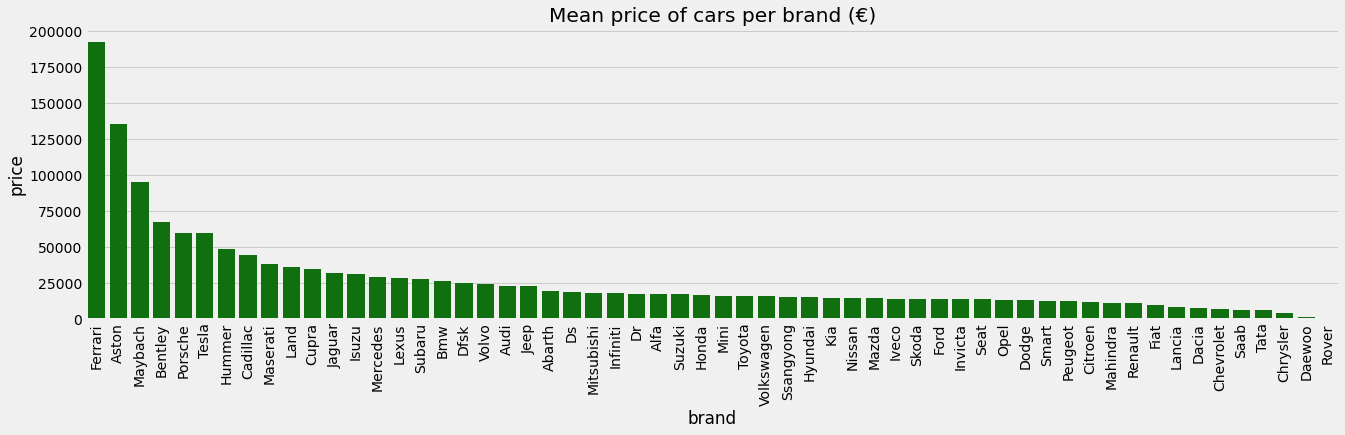

In [90]:
plt.style.use('tableau-colorblind10')

plt.figure(figsize = (20,5))

df_brands = df_brands.sort_values('price', ascending=False)

ax = sns.barplot(x=df_brands.brand, y=df_brands.price, color='g')

plt.title('Mean price of cars per brand (€)')
plt.xticks(rotation=90)

plt.show()